<a href="https://colab.research.google.com/github/chenged118/awshackathonDaAnForestPark/blob/main/dragonClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pwd

/content


In [2]:
!pip install datasets transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 16.7 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [3]:
!pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 5.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

## 資料集

In [16]:
import os
from PIL import Image
from datasets import Dataset, Features, ClassLabel, Image as DatasetImage, Value

def batch_process_images(folder_path):
    images = []
    image_file_paths = []
    labels_id = []
    # labels_real = []

    # 獲取資料夾中的所有檔案
    files = os.listdir(folder_path)

    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            # 略过 .ipynb_checkpoints 文件夹中的文件
            if '.ipynb_checkpoints' in root:
                continue

            # 检查文件是否为图像文件
            if file_name.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                try:
                    # 假设文件名格式为 label_filename.jpg
                    # label = file_name[3:-4]  # 从文件名中提取标签
                    label_id = int(file_name.split('_')[0])
                    # label = int(file_name.split('_')[0])  # 从文件名中提取标签
                    image_file_path = os.path.join(root, file_name)  # 图像的完整文件路径
                    image = Image.open(image_file_path)  # 读取图像
                    # 試試看
                    if image.mode == 'RGBA':
                        image = image.convert("RGB")

                    # 将图像、文件路径和标签添加到相应的列表中
                    images.append(image)
                    image_file_paths.append(image_file_path)
                    labels_id.append(label_id)
                    # labels_real.append(label)

                except ValueError as e:
                    print(f"Skipping file {file_name} due to error: {e}")
    # 構建所需的資料結構
    dataset = {
        'image': images,
        'image_file_path': image_file_paths,
        'labels': labels_id
    }

    return dataset

# 呼叫函數處理資料夾中的圖片
folder_path = '/content/jumbo'
prepared_dataset_dict = batch_process_images(folder_path)

# features = Features({
#     'image': DatasetImage(),
#     'image_file_path': Value('string'),
#     'labels': ClassLabel(names=labels_real)  # Modify this according to your labels
# })

# dataset = Dataset.from_dict(prepared_dataset_dict, features=features)

# 打印轉換後的資料結構
print(prepared_dataset_dict)


{'image': [<PIL.Image.Image image mode=RGB size=154x129 at 0x7D24DF7EB7C0>, <PIL.Image.Image image mode=RGB size=155x140 at 0x7D24DF7EB400>, <PIL.Image.Image image mode=RGB size=148x132 at 0x7D24DF7EB880>, <PIL.Image.Image image mode=RGB size=151x129 at 0x7D24DF7E8C10>, <PIL.Image.Image image mode=RGB size=148x132 at 0x7D24DF7E9AE0>, <PIL.Image.Image image mode=RGB size=165x143 at 0x7D24DF7E87F0>, <PIL.Image.Image image mode=RGB size=146x126 at 0x7D24DF7E9750>, <PIL.Image.Image image mode=RGB size=157x132 at 0x7D24DF7E9660>, <PIL.Image.Image image mode=RGB size=152x131 at 0x7D24DF7E83A0>, <PIL.Image.Image image mode=RGB size=163x138 at 0x7D24DF7E9630>, <PIL.Image.Image image mode=RGB size=148x128 at 0x7D24DF7E9690>], 'image_file_path': ['/content/jumbo/05_Red.png', '/content/jumbo/02_Gold.png', '/content/jumbo/10_J.png', '/content/jumbo/09_Q.png', '/content/jumbo/03_Green.png', '/content/jumbo/01_WILD.png', '/content/jumbo/08_K.png', '/content/jumbo/07_A.png', '/content/jumbo/06_Purple

In [17]:
train = test = prepared_dataset_dict

In [18]:
img = train['image'][0]

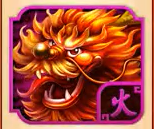

In [21]:
img

## 模型

In [10]:
from transformers import ViTImageProcessor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
processor = ViTImageProcessor.from_pretrained(model_name_or_path)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [ ]:
# # 下載和讀取圖片
# url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
# image = Image.open(requests.get(url, stream=True).raw)

# # 定義標籤和對應的數字 id
# labels = ['cat', 'dog', 'bird', 'horse', 'fish'] # 這裡放我們自己定義的類別，例如AKQJ、藍龍
# label2id = {label: idx for idx, label in enumerate(labels)}
# id2label = {idx: label for label, idx in label2id.items()}

# # 創建訓練用的數據
# # 這裡假設你有一個圖片數據集和對應的標籤列表
# # 你需要將圖片和標籤對應起來，並轉換為模型可接受的格式
# # 這裡我們簡單地將一張圖片複製 5 次，並使用不同的標籤
# images = [image] * 5
# labels = [label2id['cat']] * 5  # 假設這些圖片都是貓的圖片

In [22]:
def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = processor([x for x in example_batch['image']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['labels']
    return inputs

In [ ]:
# def transform(example):
#     inputs = processor(example['image'], return_tensors='pt')
#     inputs['labels'] = example['labels']
#     return inputs

In [24]:
from datasets import Dataset


# 將字典轉換為 Hugging Face datasets 資料結構
train_dataset = Dataset.from_dict(train)
test_dataset = Dataset.from_dict(test)

# 顯示資料集的前幾個樣本
print(train_dataset)


Dataset({
    features: ['image', 'image_file_path', 'labels'],
    num_rows: 11
})


In [25]:
trainingData = train_dataset.with_transform(transform)
testingData = test_dataset.with_transform(transform)

In [26]:
testingData[0:2]

{'pixel_values': tensor([[[[ 0.4039,  0.0745,  0.0196,  ...,  0.1529,  0.1765,  0.4745],
          [ 0.4039,  0.0745,  0.0196,  ...,  0.1529,  0.1765,  0.4745],
          [ 0.4039,  0.0745,  0.0196,  ...,  0.1529,  0.1765,  0.4745],
          ...,
          [ 0.4824,  0.1373,  0.0667,  ...,  0.0980,  0.1216,  0.4196],
          [ 0.4745,  0.1294,  0.0588,  ...,  0.0980,  0.1216,  0.4196],
          [ 0.4667,  0.1294,  0.0588,  ...,  0.0980,  0.1216,  0.4196]],

         [[-0.2784, -0.4980, -0.4196,  ..., -0.5765, -0.6941, -0.5059],
          [-0.2784, -0.4980, -0.4196,  ..., -0.5765, -0.6941, -0.5059],
          [-0.2784, -0.4980, -0.4196,  ..., -0.5765, -0.6941, -0.5059],
          ...,
          [-0.2941, -0.5216, -0.4510,  ..., -0.5686, -0.6706, -0.4667],
          [-0.2941, -0.5216, -0.4431,  ..., -0.5686, -0.6706, -0.4667],
          [-0.2941, -0.5216, -0.4431,  ..., -0.5686, -0.6706, -0.4667]],

         [[-0.5451, -0.7725, -0.7176,  ..., -0.7412, -0.8980, -0.7804],
          [-0

In [27]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }


In [28]:
torch.tensor([x['labels'] for x in testingData])

tensor([ 5,  2, 10,  9,  3,  1,  8,  7,  6,  0,  4])

In [29]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)


<ipython-input-29-3044fb6e3895>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:759: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.19.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [30]:
labels = train['labels']
labels

[5, 2, 10, 9, 3, 1, 8, 7, 6, 0, 4]

In [31]:
from transformers import ViTForImageClassification

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(set(labels)),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# !pip install transformers[torch]

In [32]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./jumbo',
    per_device_train_batch_size=16,
    evaluation_strategy="steps",
    num_train_epochs=1000,
    fp16=True,
    save_steps=1000,
    eval_steps=1000,
    logging_steps=10,
    learning_rate=2e-4,
    save_total_limit=2,
    remove_unused_columns=False,
    push_to_hub=False,
    report_to='tensorboard',
    load_best_model_at_end=True,
    logging_dir='./jumbo/logs',
    # load_best_model_at_end=True,
)


In [33]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=trainingData,
    eval_dataset=testingData,
    tokenizer=processor,
)


In [34]:
train_results = trainer.train()

Step,Training Loss,Validation Loss,Accuracy
1000,0.003600,0.003641,1.000000


In [35]:
folder_path = '/content/jumbo'
files = os.listdir(folder_path)

id2label = {}

for root, dirs, files in os.walk(folder_path):
    for file_name in files:
        # 略过 .ipynb_checkpoints 文件夹中的文件
        if '.ipynb_checkpoints' in root:
            continue

        # 检查文件是否为图像文件
        if file_name.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            try:
                # 假设文件名格式为 label_filename.jpg
                label = file_name[3:-4]  # 从文件名中提取标签
                label_id = int(file_name.split('_')[0])
                # label = int(file_name.split('_')[0])  # 从文件名中提取标签

                id2label[label_id] = label

            except ValueError as e:
                print(f"Skipping file {file_name} due to error: {e}")
# 構建所需的資料結構
id2label

{5: 'Red',
 2: 'Gold',
 10: 'J',
 9: 'Q',
 3: 'Green',
 1: 'WILD',
 8: 'K',
 7: 'A',
 6: 'Purple',
 0: 'BONUS',
 4: 'Blue'}

In [53]:
from PIL import Image
import torch
from transformers import ViTImageProcessor, ViTForImageClassification

# 加载图像
img = Image.open('/content/jumbo/test/位置2.png')

# 如果图像是RGBA模式，则转换为RGB模式
if img.mode == 'RGBA':
    img = img.convert("RGB")

# 使用 ViTImageProcessor 处理图像
processor = ViTImageProcessor.from_pretrained(model_name_or_path)
img_map = processor(images=img, return_tensors='pt')

# 确保输入张量的类型与模型参数的类型匹配
if torch.cuda.is_available():
    model = model.to('cuda')
    img_map = {k: v.to('cuda') for k, v in img_map.items()}

# 将输入传递给模型
outputs = model(**img_map)
predicted_class_idx = outputs.logits.argmax(-1).item()

# 打印预测结果
print("Predicted class:", id2label[predicted_class_idx])


Predicted class: Purple
